# Motivation
The purpose of this exploration is to see if chemical analysis can be used to predict the rated quality of wine and demonstrate knowledge of using machine learning to predict quality of wine.

The classifier used will be a Logit Regression that classifies the wine based on the summed probability of the factored characteristics

In [456]:
# To clean and explore data
import pandas as pd
import numpy as np

# To visualize data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# To model the results
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
rdf = pd.read_csv('winequality-red.csv', delimiter = ';')

# Summary Stats Exploration

In [3]:
rdf.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
rdf.iloc[:,:6].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000


In [5]:
rdf.iloc[:,6:].describe()

,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
# Make Univariate plots for each.
def UnivariateBar(dataframe, columnindex, bins = 'auto', 
                  ylabel = 'Count'):
    series = dataframe.iloc[:, columnindex]
    xlabel = dataframe.columns[columnindex]
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title('Frequencies of Wine ' + xlabel + ' levels')
    plt.hist(series, bins)
    plt.show()

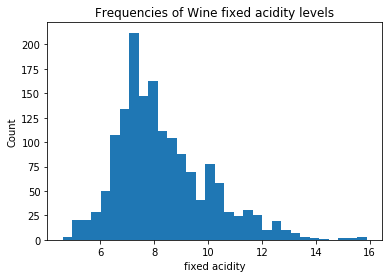

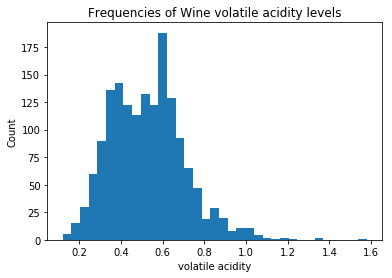

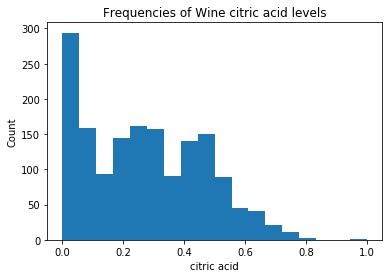

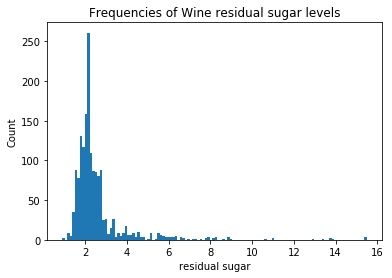

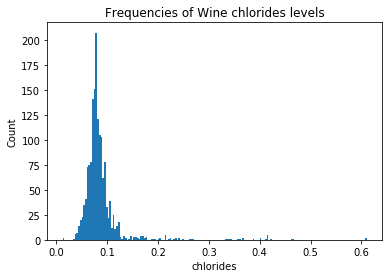

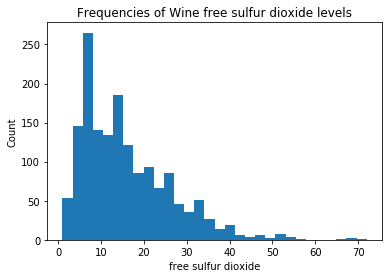

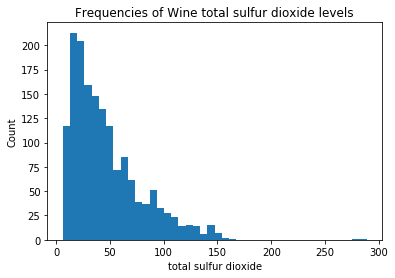

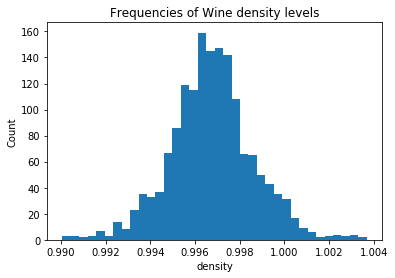

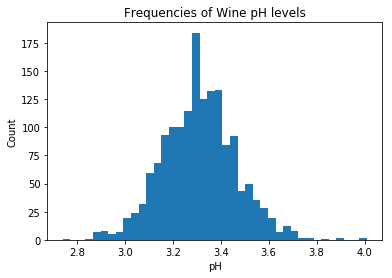

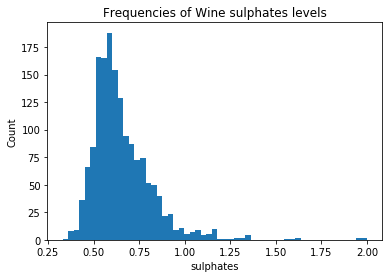

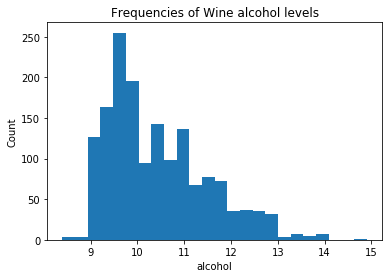

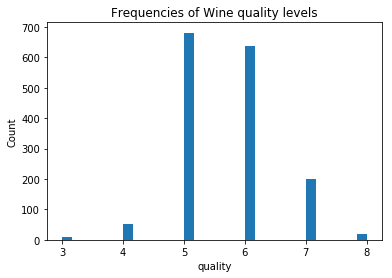

In [7]:
for x in range(len(rdf.columns)):
    UnivariateBar(rdf, x)

### Incorporate Summary Statistics

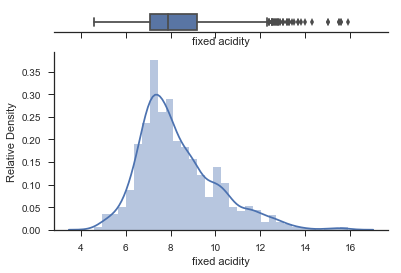

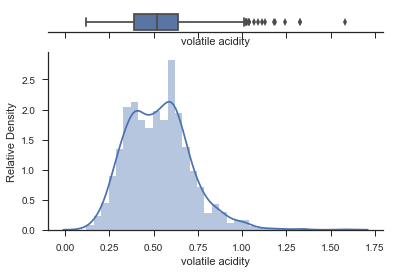

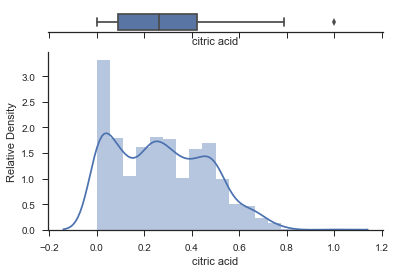

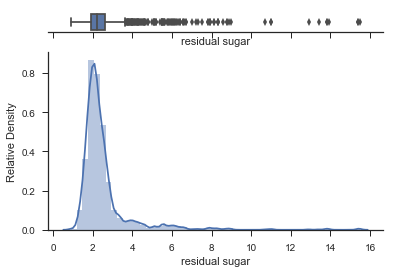

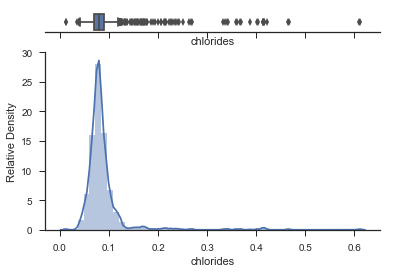

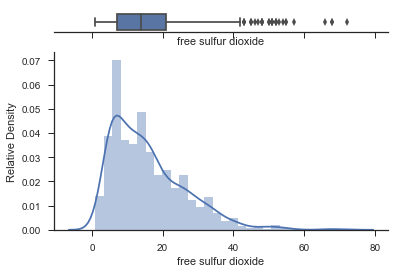

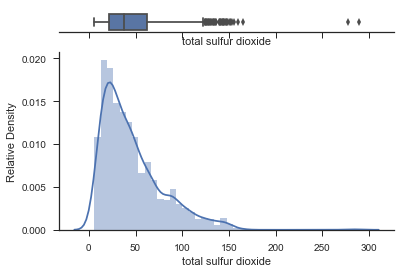

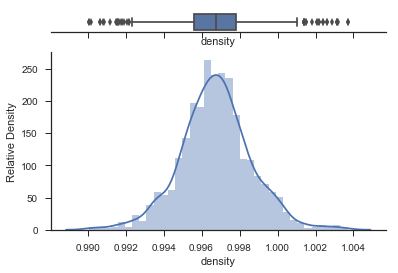

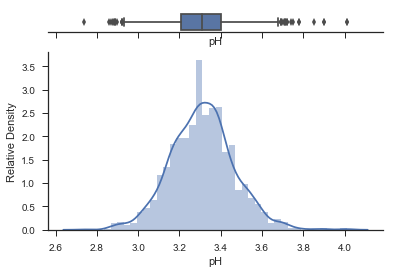

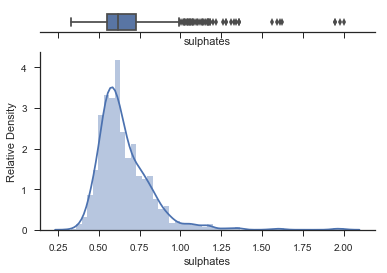

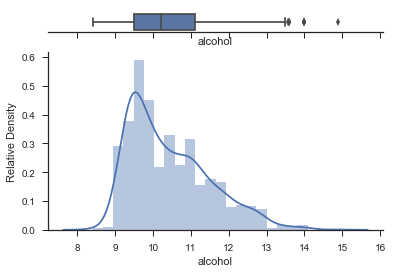

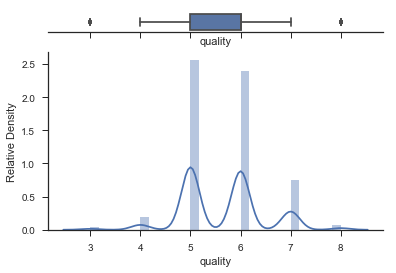

In [8]:
# https://stackoverflow.com/questions/33381330/histogram-with-boxplot-above-in-python
# Make Univariate plots for each.

def KDEBox(dataframe, columnindex):
    x = dataframe.iloc[:, columnindex]
    sns.set(style = 'ticks')
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.1, .9)})
    sns.boxplot(x, ax=ax_box)
    
    sns.distplot(x, ax=ax_hist)
    ax_box.set(yticks = [])
    ax_hist.set(ylabel = 'Relative Density')
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)

for x in range(len(rdf.columns)):
    KDEBox(rdf, x)             

## Machine Learning
For the classification, I will be using a Logit regression to predict wine quality

In [9]:
data = rdf.iloc[:, :-1].copy().reset_index(drop = True)
labels = rdf.iloc[:, -1:].copy().reset_index(drop = True)

In [10]:
labels[labels <= 5] = 0
labels[labels > 5] = 1

In [11]:
features_train, features_test, labels_train, labels_test = train_test_split(data, labels, test_size=0.2, random_state=5)

In [12]:
logit = LogisticRegression()
logit.fit(features_train, 
          labels_train)
print ('Training score is: ' + str(logit.score(features_train, labels_train)))
print ('Testing score is: ' + str(logit.score(features_test, labels_test)))

Training score is: 0.742767787334
Testing score is: 0.771875


C:\Users\Karsten\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The results of .7428 and .7719 are okay.
The similarity in results shows that I am not overfitting.
I will see if I am lacking data by decreasing the test size relative to the training size. 

In [13]:
pd.DataFrame({'Variables': rdf.columns[:-1], 'Coefficients': logit.coef_[0]})

,Coefficients,Variables
0,-0.003005,fixed acidity
1,-2.743330,volatile acidity
2,-0.527102,citric acid
3,0.029005,residual sugar
4,-1.626825,chlorides
5,0.022919,free sulfur dioxide
6,-0.016656,total sulfur dioxide
7,-1.123443,density
8,-1.517342,pH
9,1.752688,sulphates


The coefficients illustrate a few clear points, volatile acidity is definitely disliked, as is higher levels of chlorides (salt). Volatile acids are described to result in a poignant taste that is also present in vinager. From some research below, chlorides are added to reduce the bitterness which may not be ideal since it could be a result of a worse harvest. Likewise, the low pH wines are made grapes with more natural acids grown in cooler regions.

In [14]:
features_train, features_test, labels_train, labels_test = train_test_split(data, labels, test_size=0.1, random_state=5)
logit = LogisticRegression()
logit.fit(features_train, 
          labels_train)
print ('Training score is: ' + str(logit.score(features_train, labels_train)))
print ('Testing score is: ' + str(logit.score(features_test, labels_test)))

Training score is: 0.74148714385
Testing score is: 0.775


C:\Users\Karsten\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


These results show negligible difference of less than 1% change. To explore, I will look more at the theory and clip any features that may be unnecessary to track.
Acetaldehyde, a volatile compound found in wine that is produced in the alcoholic fermentation. It is produced in greater amounts with wines that have SO2. 
SO2 is sulfur dioxide, it appears in inorganic and organic forms. 
SO2 can bind to the aldehydes in wine to reduce the armoas.
SO2 also lowers bacterial growth, which is unnecessary when the pH is low and the alcohol percent is high. 
A low pH is a result of more acids. Grapes that are produced in a cool climate are high in acidity due to a slower ripening season. The high level of acidity is natural which result in a natural grape taste in the wine. 
Citric acid is added after the fact to add a more fruity taste, it can also make a wine less flat. 
Sulphates are present in all wines, but sometimes are added to prevent bacterial growth. 
Density is inversely related to alcohol levels.
Chlorides, or sodium chloride, which is salt, is added to reduce bitterness. Americans who drink tequila shots often use salt as a chaser to reduce the bite from the drink. 
Finally, there are different types of wines, each to belong in their own group. This would suggest clustering. There are wines that are meant to be acidic to be paired with oily foods such as meat, or strong flavoured cheese. Sweet wines are only to be paired with desserts of matching sweetness. 
Red wines tend to be more bitter, less sweet, and be less acidic. This is because they keep the grape skins throughout fermentation. 

Finally, to tie the variables together. I will repeat the model except only look at factors that affect the taste.
Density will be removed because it is collinear with alcohol, which will negatively affect the model.
Residual sugar will be removed because it has a clustering effect, most wines are made to be paired with normal foods, while some wines will have high levels of sugars to be paired with desserts and sweeter items. 
Citric Acid will be removed since it is added after the wine has been produced, it helps add freshness to the wine, but should not be the key factor in adjusting taste. 

In [41]:
rdf_copy = rdf.copy()

In [454]:
rdf = rdf_copy.copy()

In [448]:
# rdf = rdf[rdf['citric acid'] < np.percentile(rdf['citric acid'], 75)]

# rdf = rdf[rdf['chlorides'] < np.percentile(rdf['chlorides'], 90)]

# rdf = rdf[rdf['residual sugar'] < np.percentile(rdf['residual sugar'], 95)]

In [455]:
data = rdf.iloc[:, :-1].copy().reset_index(drop = True)
data = rdf.loc[:, ['fixed acidity', 'volatile acidity', 'alcohol', 'sulphates', 'free sulfur dioxide', 'total sulfur dioxide']]
labels = rdf.iloc[:, -1:].copy().reset_index(drop = True)
labels[labels <= 5] = 0
labels[labels > 5] = 1
features_train, features_test, labels_train, labels_test = train_test_split(data, labels, test_size=0.2, random_state=5)
logit = LogisticRegression()
logit.fit(features_train, 
          labels_train)
print ('Training score is: ' + str(logit.score(features_train, labels_train)))
print ('Testing score is: ' + str(logit.score(features_test, labels_test)))

Training score is: 0.742767787334
Testing score is: 0.78125


C:\Users\Karsten\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


After a lot of matching around results, it seems that I cannot substantially improve upon the previous score.
Right now the testing score with omitted variables is at .7813 while the training score is .7428. Compared to the original regression, the testing score has improved by a percent. 

What can be gathered from this result is that factors such as citric acid, residual sugar, and density are not main factors in deciding whether a wine is good or not. This is supported by theory as well as omitting the variables individually and together. These results also show that the techniques of logistic regression may not be the best determinant for predicting wine ratings. There are many types of wines out there, and there is not a one wine fits all. This can also show that despite how sought after wine may be to one person, it is in the end subjective to the person who consumes the wine. This regression results in roughly a 75% accuracy, which is notably better than flipping a coin to decide whether a wine is good, but also shows that wines are often rated on other factors that affect smell, the bite of the wine, and the level of alcohol over their sweetness. 